In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('C:\\Users\\kushagra gemini\\Desktop\\New folder (2)\\dataset3-main\\dataset3-main\\glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [75]:
df.shape

(213, 11)

In [76]:
df.columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [77]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Check null values

In [78]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

Insight of Datatype

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [80]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [81]:
df.drop(['Id'], axis=1,inplace=True)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type of glass'}>, <Axes: >, <Axes: >]],
      dtype=object)

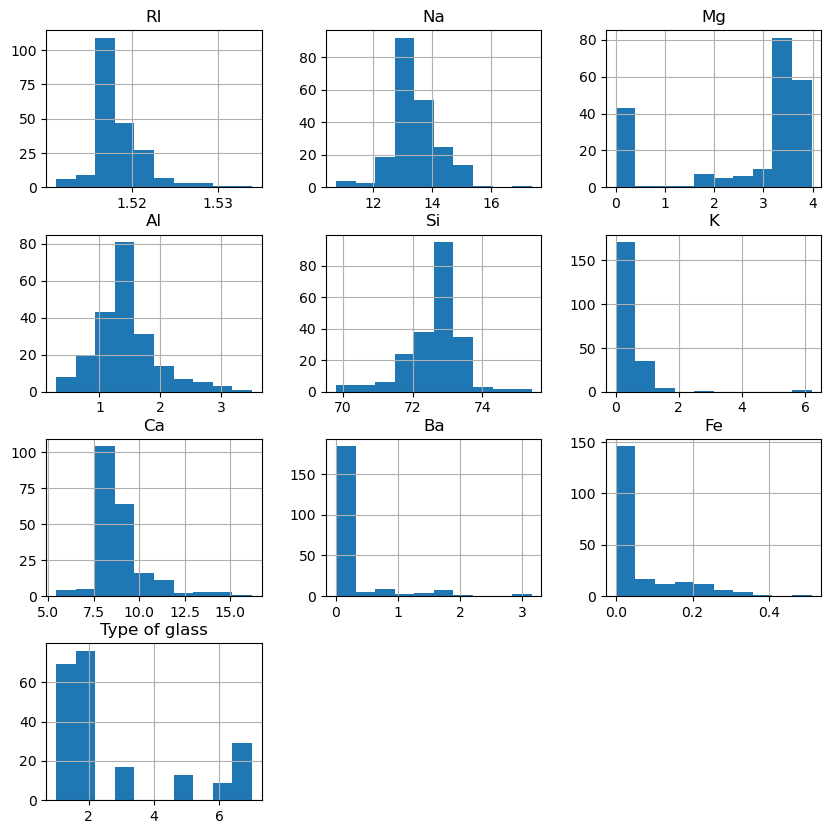

In [82]:
df.hist(figsize= (10,10))

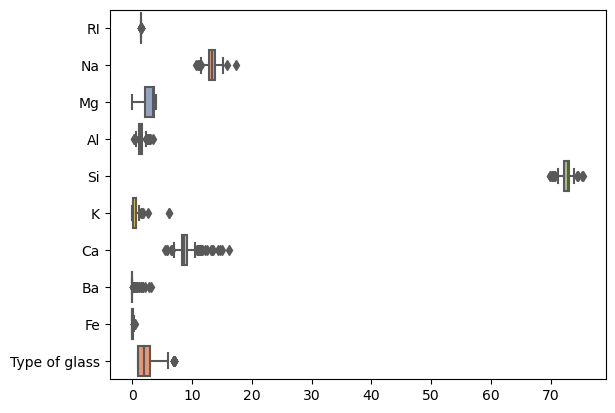

In [83]:
boxplot = sns.boxplot(data=df, orient="h", palette="Set2")

In [84]:
corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type of glass,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


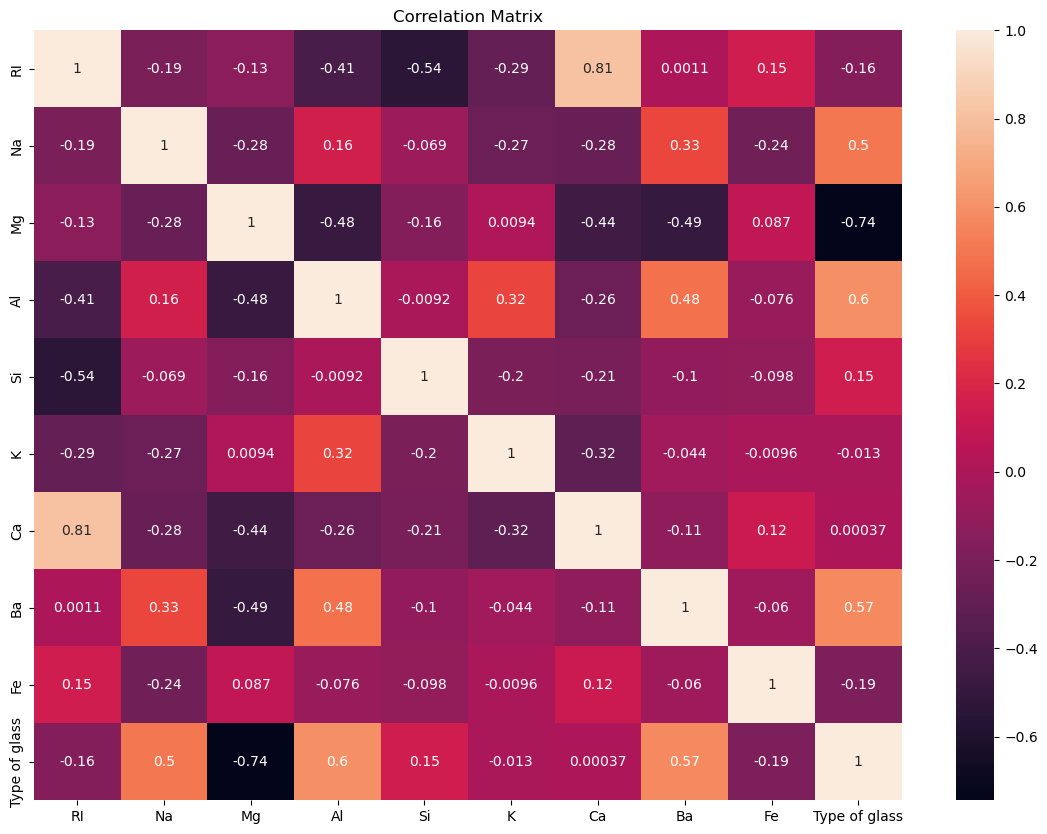

In [85]:
corr_mat = df.corr()
plt.figure(figsize=[14,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_matrix.jpg")
plt.show()

<Axes: >

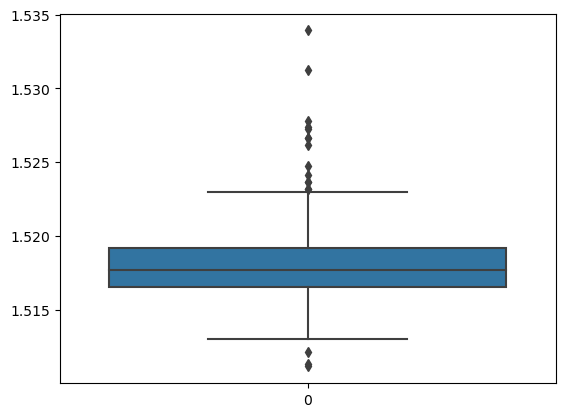

In [86]:
import seaborn as sns
sns.boxplot(df['RI'])

<Axes: >

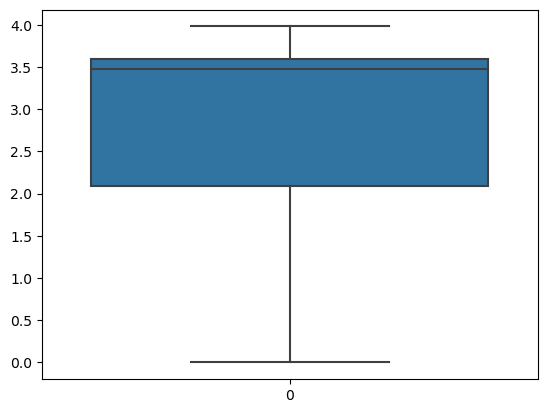

In [87]:
import seaborn as sns
sns.boxplot(df['Mg'])

<Axes: >

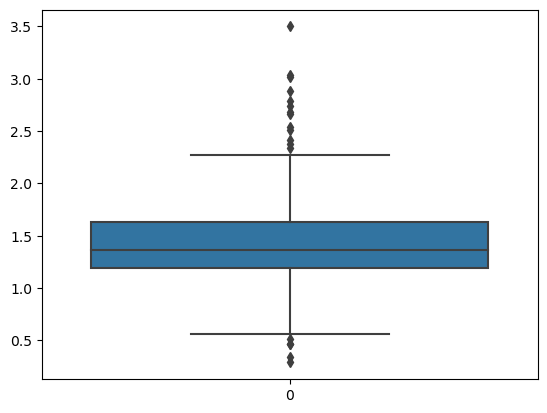

In [88]:
import seaborn as sns
sns.boxplot(df['Al'])

<Axes: >

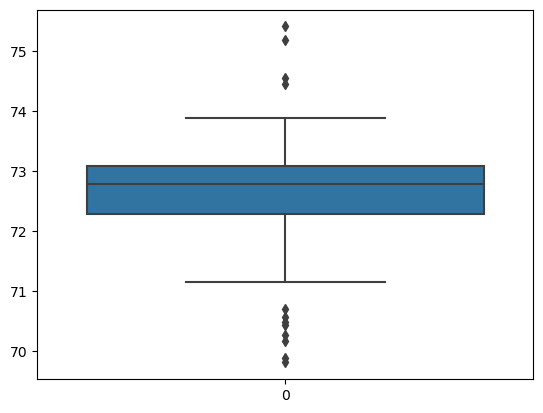

In [89]:
import seaborn as sns
sns.boxplot(df['Si'])

<Axes: >

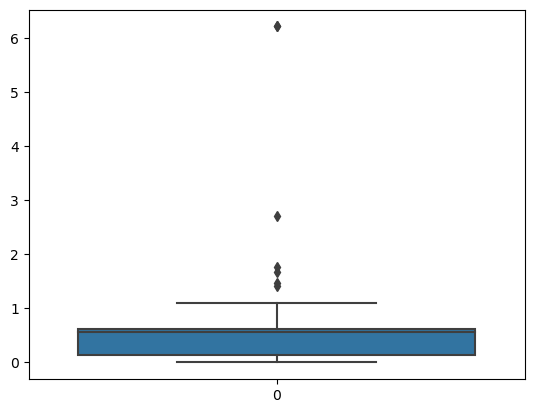

In [90]:
import seaborn as sns
sns.boxplot(df['K'])

<Axes: >

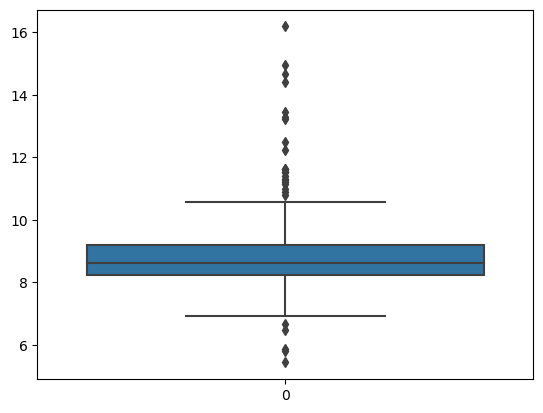

In [91]:
import seaborn as sns
sns.boxplot(df['Ca'])

<Axes: >

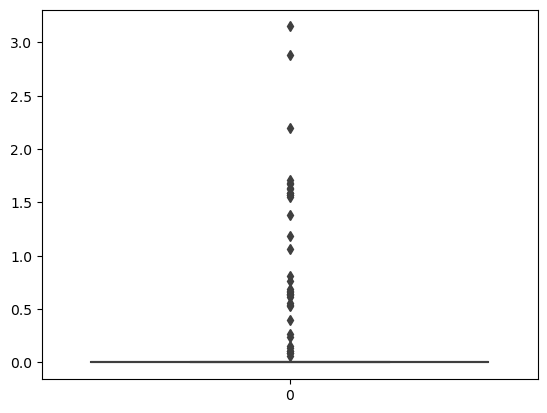

In [92]:
import seaborn as sns
sns.boxplot(df['Ba'])

[]

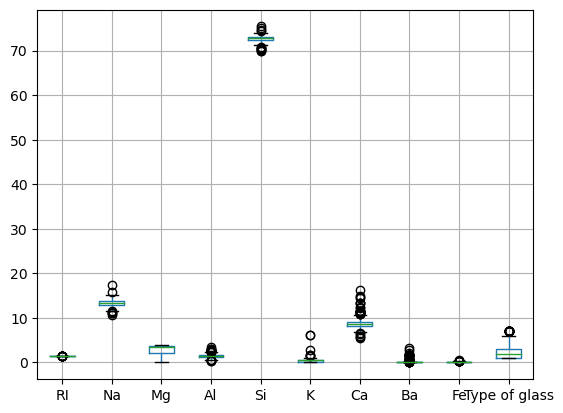

In [93]:
df.boxplot(return_type='dict')
plt.plot()

Model Building:-

In [94]:
X=df.drop(columns=['Type of glass'],axis=1)
y=df['Type of glass']

In [95]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [96]:
X_scaled

array([[-0.2451006 ,  0.59188032,  0.64293659, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-0.71682556,  0.15094587,  0.60814353, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-0.22860672, -0.24099586,  0.7055641 , ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 0.75772729,  1.16754474, -1.8621639 , ..., -0.36395239,
         2.94550057, -0.58830108],
       [-0.60796596,  1.19204109, -1.8621639 , ..., -0.33584439,
         2.80467644, -0.58830108],
       [-0.4100394 ,  1.00831841, -1.8621639 , ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]

In [99]:
vif["features"] = X.columns
vif

,vif,features
0,9.512636,RI
1,61.800820,Na
2,206.400829,Mg
3,25.629094,Al
4,57.871368,Si
5,43.577914,K
6,211.664529,Ca
7,26.151119,Ba
8,1.219902,Fe


In [100]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=9)

Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [103]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

The model showing highest accuracy so we need to take hyper parameter with Grid SearchCV to overcome Overfitting
Hyperparameter Tuning

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
params ={'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15]} 

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params=>',grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 13}


In [107]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=13)

In [108]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 97.99%

======TestResult========
Accuracy Score: 78.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.79      0.80        28
           2       0.69      0.82      0.75        22
           3       0.00      0.00      0.00         2
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.78        64
   macro avg       0.75      0.70      0.72        64
weighted avg       0.78      0.78      0.78        64



KNeighborsClassifier

In [109]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [110]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 69.80%

======TestResult========
Accuracy Score: 68.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        28
           2       0.57      0.55      0.56        22
           3       0.00      0.00      0.00         2
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.69        64
   macro avg       0.67      0.66      0.66        64
weighted avg       0.67      0.69      0.67        64



Hyperparameter Tuning

In [112]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[3,5,6,7,8],
             'n_neighbors':[3,5,7,9,11,13]}

In [113]:
gridsearch = GridSearchCV(estimator=knn,
                         param_grid=param_grid)

In [114]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [115]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [116]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [117]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 79.87%

======TestResult========
Accuracy Score: 73.44%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.75      0.75      0.75        28
           2       0.68      0.68      0.68        22
           3       0.33      0.50      0.40         2
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.73        64
   macro avg       0.75      0.76      0.75        64
weighted avg       0.74      0.73      0.74        64



Decision Tree Classifier

In [118]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [119]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 71.88%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.75      0.78        28
           2       0.74      0.64      0.68        22
           3       0.50      1.00      0.67         2
           5       0.75      0.60      0.67         5
           6       0.25      1.00      0.40         1
           7       0.71      0.83      0.77         6

    accuracy                           0.72        64
   macro avg       0.63      0.80      0.66        64
weighted avg       0.75      0.72      0.73        64



Hyper parameter Tuning

In [121]:
grid_param = {'criterion':['gini','entrophy'],
             'max_depth':range(5,7),
             'min_samples_leaf':range(2,6),
             'min_samples_split':range(3,8),
             'max_leaf_nodes':range(5,10)}

In [122]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,cv=5,n_jobs=-1)

In [123]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': range(5, 7),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [124]:
best_parameters = grid_search.best_params_
print(best_parameters)


{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [125]:
clf = DecisionTreeClassifier(criterion='gini',
                            min_samples_split=3,max_depth=10,
                            min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [126]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 89.93%

======TestResult========
Accuracy Score: 70.31%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        28
           2       0.72      0.59      0.65        22
           3       0.25      0.50      0.33         2
           5       1.00      0.40      0.57         5
           6       0.33      1.00      0.50         1
           7       0.86      1.00      0.92         6

    accuracy                           0.70        64
   macro avg       0.65      0.71      0.62        64
weighted avg       0.74      0.70      0.70        64



Gradient Boosting Classifier

In [127]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))


In [128]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [129]:
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 76.56%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.86      0.68      0.76        28
           2       0.72      0.82      0.77        22
           3       0.40      1.00      0.57         2
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00         1
           7       0.86      1.00      0.92         6

    accuracy                           0.77        64
   macro avg       0.77      0.85      0.78        64
weighted avg       0.79      0.77      0.77        64



Hyper parameter Tuning

In [130]:
grid_param = {'max_depth':range(4,8),
             'min_samples_split':range(2,8,2),
             'learning_rate':np.arange(0.1,0.3)}

In [131]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [132]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 6}

In [133]:
gbdt_clf = GradientBoostingClassifier(max_depth=8,min_samples_split=2,learning_rate = 0.1)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8)

In [134]:
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 79.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.88      0.75      0.81        28
           2       0.72      0.82      0.77        22
           3       0.67      1.00      0.80         2
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         6

    accuracy                           0.80        64
   macro avg       0.84      0.86      0.83        64
weighted avg       0.82      0.80      0.80        64



With hyper parameter traing, test result increased by comparing all models which has high test result can be taken as consideration to find Type of glass
i.e. RandomForestClassifier

In [135]:
import pickle
filename = 'Glass Identification project.pkl'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))